<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [2]:
#Importing Libraries
import warnings
warnings.filterwarnings("ignore")

import csv, pickle, os, math, pdb, gc, datetime, time
import pandas as pd
import numpy as np
import matplotlib, matplotlib.pylab as plt, seaborn as sns
from matplotlib import rcParams #Size of plots 
from sklearn.cluster import MiniBatchKMeans, KMeans #Clustering
import xgboost as xgb
import networkx as nx
from pandas import HDFStore, DataFrame, read_hdf
from scipy.sparse.linalg import svds, eigs
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [3]:
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df', mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df', mode='r')
print(df_final_train.shape)
print(df_final_test.shape)

(100002, 55)
(50002, 55)


In [4]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [5]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [6]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
print(df_final_train.shape)
print(df_final_test.shape)

(100002, 52)
(50002, 52)


Estimators= 10 Train Score= 0.9194695487437498 test Score= 0.9112920146028283
Estimators= 50 Train Score= 0.9215275388609139 test Score= 0.9165982700928089
Estimators= 100 Train Score= 0.9227267982044055 test Score= 0.9182249393907452
Estimators= 250 Train Score= 0.9222784942306688 test Score= 0.9175890203023213
Estimators= 450 Train Score= 0.9227731461167178 test Score= 0.9182519930822121


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

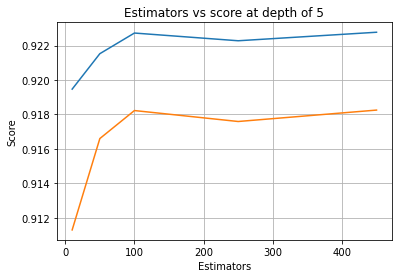

In [9]:
estimators = [10, 50, 100, 250, 450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(n_estimators=i, max_depth=5, min_samples_leaf=52, min_samples_split=120, n_jobs=-1, random_state=25)
    clf.fit(df_final_train, y_train)
    
    train_sc = f1_score(y_train, clf.predict(df_final_train))
    test_sc = f1_score(y_test, clf.predict(df_final_test))
    
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators=',i,'Train Score=',train_sc,'test Score=',test_sc)
    
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.grid()
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8790408223949705 test Score 0.8598240469208212
depth =  9 Train Score 0.9588442221273308 test Score 0.9238407098341608
depth =  11 Train Score 0.9628276925574224 test Score 0.9256889452011403
depth =  15 Train Score 0.9650638655632426 test Score 0.9268426610348469
depth =  20 Train Score 0.9661409596261039 test Score 0.9275435709161497
depth =  35 Train Score 0.9661327370050694 test Score 0.9274469252521841
depth =  50 Train Score 0.9661327370050694 test Score 0.9274469252521841
depth =  70 Train Score 0.9661327370050694 test Score 0.9274469252521841
depth =  130 Train Score 0.9661327370050694 test Score 0.9274469252521841


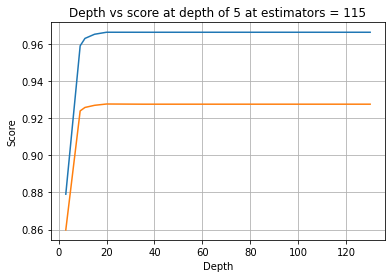

In [10]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, max_depth=i, min_samples_leaf=52, min_samples_split=120, n_estimators=115, n_jobs=-1,random_state=25)
    clf.fit(df_final_train, y_train)
    
    train_sc = f1_score(y_train, clf.predict(df_final_train))
    test_sc = f1_score(y_test, clf.predict(df_final_test))
    
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i, 'Train Score',train_sc, 'test Score',test_sc)
    
plt.plot(depths, train_scores,label='Train Score')
plt.plot(depths, test_scores,label='Test Score')
plt.grid()
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [11]:
param_dist = {"n_estimators":sp_randint(105, 125),
              "max_depth": sp_randint(10, 15),
              "min_samples_split": sp_randint(110, 190),
              "min_samples_leaf": sp_randint(25, 65)}

clf = RandomForestClassifier(random_state=25, n_jobs=-1, verbose=True)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=5, cv=10, scoring='f1', n_jobs=-1, random_state=25, verbose=True)

rf_random.fit(df_final_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:   11.9s finished


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=25,
                                                    verbose=True),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D3D5CBD390>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D3D5CBD7B8>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D3D5CBD630>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D3D5CBD3C8>},
                   random_state=25, scoring='f1', verbose=True)

In [27]:
print('mean test scores', rf_random.cv_results_['mean_test_score'])

mean test scores [0.96332902 0.96279969 0.96088596 0.96321947 0.9649849 ]


In [28]:
# print('mean train scores', rf_random.cv_results_['mean_train_score'])

In [29]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25,
                       verbose=True)


In [30]:
clf = RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111, n_estimators=121, n_jobs=-1, oob_score=False, random_state=25)

In [31]:
clf.fit(df_final_train, y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [32]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train, y_train_pred))
print('Test f1 score',f1_score(y_test, y_test_pred))

Train f1 score 0.9665801427644386
Test f1 score 0.927324229484632


In [33]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T) # precision
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4)) # recall
    
    labels = [0,1]
    # representing A in heatmap format
    cmap = sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


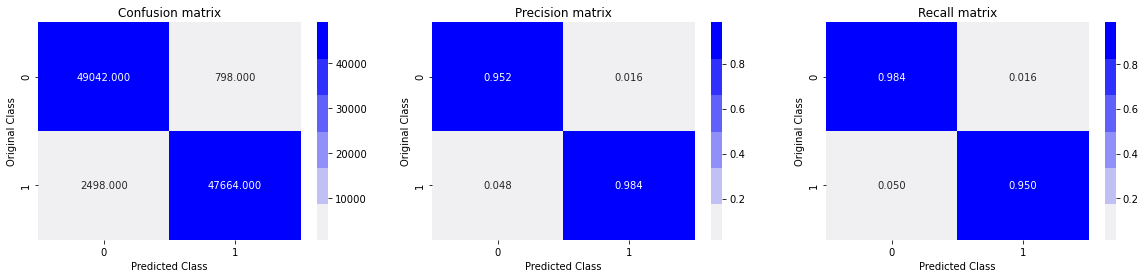

Test confusion_matrix ----------------------------------------------------------------------------------------------------


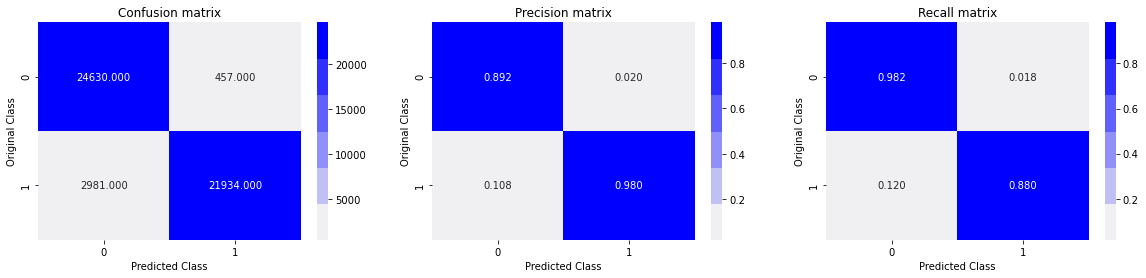

In [34]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train, y_train_pred)

print('Test confusion_matrix', '-'*100)
plot_confusion_matrix(y_test,y_test_pred)

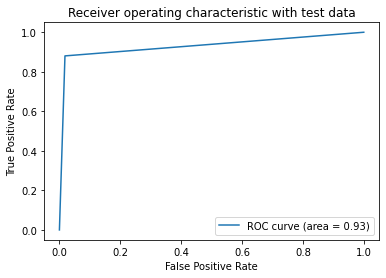

In [35]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,ths = roc_curve(y_test, y_test_pred)
auc_sc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

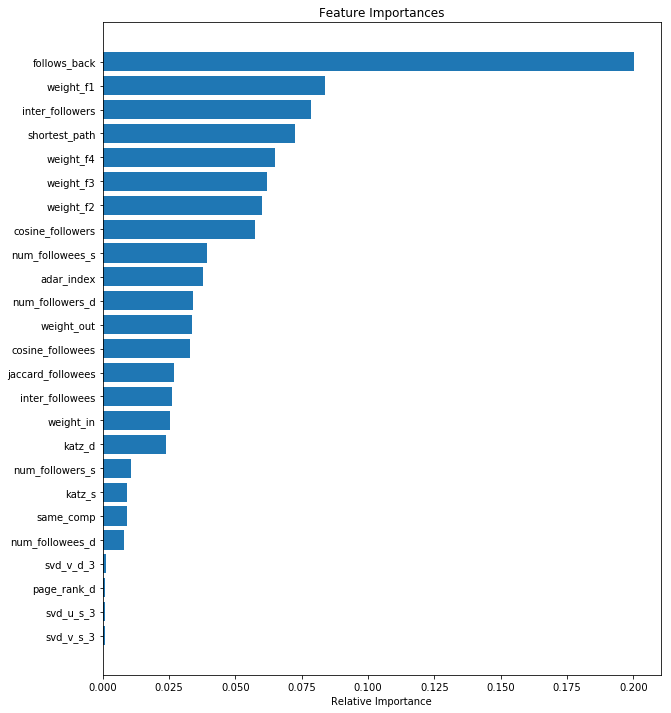

In [53]:
features = df_final_train.columns

importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]

plt.figure(figsize=(10,12))
plt.barh(range(len(indices)), importances[indices])

plt.title('Feature Importances')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

1 - Please go through the files in the google drive link. The instructions for the assignment are mention in the last cell of the file FB_Models.ipynb<br>
- Add another feature called Preferential Attachment with followers and followees data of vertex. you can check about Preferential Attachment in below link http://be.amazd.com/link-prediction/
- Add feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features. you can read about this in below pdf https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf
- Tune hyperparameters for XG boost with all these features and check the error metric.<br>

2 - At the end in your conclusions section please elaborate on the step by step procedure you followed to solve this case study.<br>
3 - Please note that based on the results you get the team can request you to implement different models/featurizations/plotting other than what we have mentioned in the instruction videos. <br>
4 - you can try using GCP: https://www.youtube.com/channel/UCRH_z-oM0LROvHPe_KYR4Wg
 

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

**step 1 and 2 of above assignment is implemented in FB_featurization-1 file, and the result is stored in storage_sample_stage5.h5 file**

# Model 1 - Random Forest

In [3]:
df_final_train = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'train_df', mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'test_df', mode='r')
print(df_final_train.shape)
print(df_final_test.shape)

(100002, 58)
(50002, 58)


In [4]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_attachment_follower', 'preferential_attachment_followees',
       'svd_dot'],
      

In [5]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [6]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'], axis=1, inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'], axis=1, inplace=True)
print(df_final_train.shape)
print(df_final_test.shape)

(100002, 55)
(50002, 55)


In [9]:
param_dist = {"n_estimators":sp_randint(105, 125),
              "max_depth": sp_randint(10, 15),
              "min_samples_split": sp_randint(110, 190),
              "min_samples_leaf": sp_randint(25, 65)}

clf = RandomForestClassifier(random_state=25, n_jobs=-1, verbose=True)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=5, cv=10, scoring='f1', n_jobs=-1, random_state=25, verbose=True, return_train_score=True)

rf_random.fit(df_final_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.8min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:   12.4s finished


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=25,
                                                    verbose=True),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000270A7C246D8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000270A7C19DD8>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000270A7C24240>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000270A7C24860>},
                   random_state=25, return_train_score=True, scoring='f1',
                   verbose=True)

In [10]:
print('mean test scores', rf_random.cv_results_['mean_test_score'])

mean test scores [0.96415678 0.96358312 0.96226306 0.96355413 0.96498085]


In [11]:
print('mean train scores', rf_random.cv_results_['mean_train_score'])

mean train scores [0.96494625 0.96437094 0.96278007 0.96455569 0.96612788]


In [12]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25,
                       verbose=True)


In [13]:
clf = RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111, n_estimators=121, n_jobs=-1, oob_score=False, random_state=25)

In [14]:
clf.fit(df_final_train, y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [15]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train, y_train_pred))
print('Test f1 score',f1_score(y_test, y_test_pred))

Train f1 score 0.9652533881236021
Test f1 score 0.9235330241619549


In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T) # precision
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4)) # recall
    
    labels = [0,1]
    # representing A in heatmap format
    cmap = sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


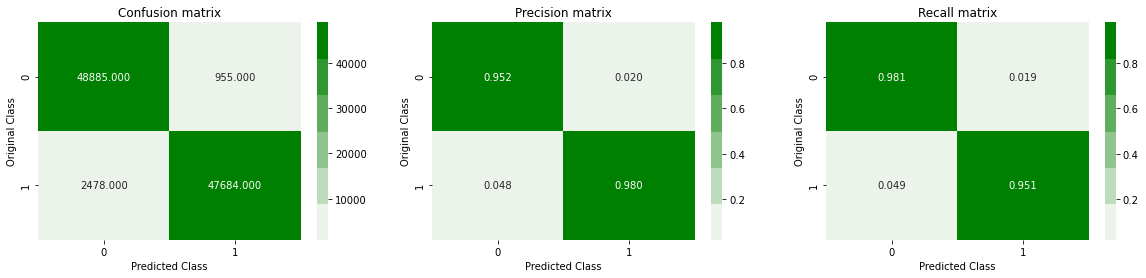

Test confusion_matrix ----------------------------------------------------------------------------------------------------


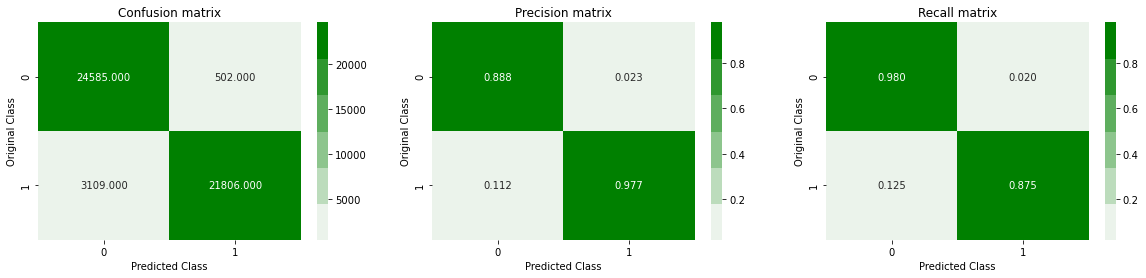

In [17]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train, y_train_pred)

print('Test confusion_matrix', '-'*100)
plot_confusion_matrix(y_test,y_test_pred)

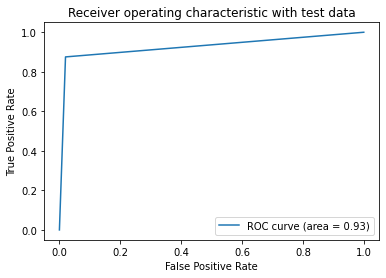

In [18]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,ths = roc_curve(y_test, y_test_pred)
auc_sc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

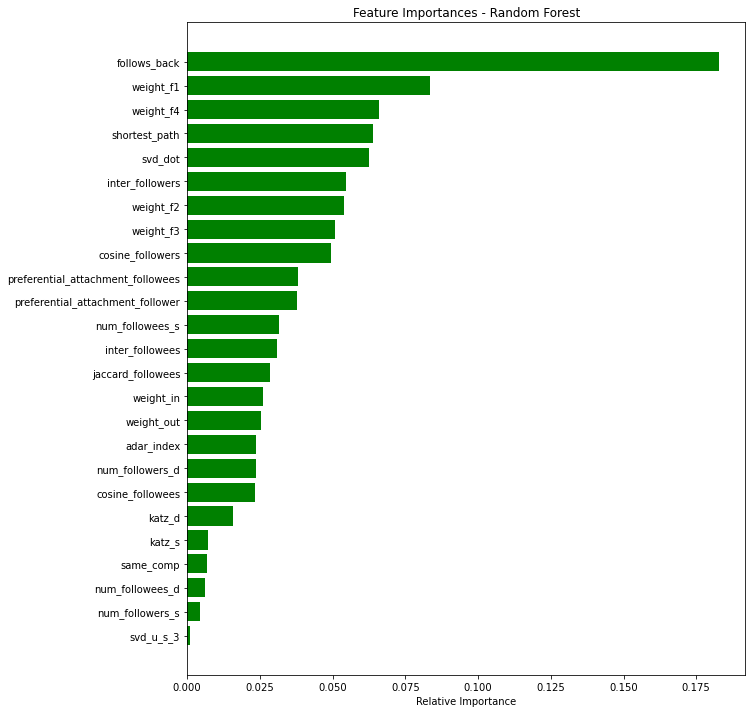

In [19]:
features = df_final_train.columns

importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]

plt.figure(figsize=(10,12))
plt.barh(range(len(indices)), importances[indices], color='green')

plt.title('Feature Importances - Random Forest')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Model 2 - XGBoost

In [20]:
param_dist = {"max_depth":[1,2,3,4,5], "n_estimators":sp_randint(100, 125)}

clf = xgb.XGBClassifier(random_state=25, n_jobs=-1, verbose=True)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=5, cv=10, scoring='f1', n_jobs=-1, random_state=25, verbose=True, return_train_score=True)

rf_random.fit(df_final_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.5min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(n_jobs=-1, random_state=25,
                                           verbose=True),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000270AE8FE048>},
                   random_state=25, scoring='f1', verbose=True)

In [24]:
print('mean test scores', rf_random.cv_results_['mean_test_score'])

mean test scores [0.97686962 0.97698448 0.92828407 0.96974185 0.96756754]


In [36]:
# print('mean train scores', rf_random.cv_results_['mean_train_score'])

In [26]:
print(rf_random.best_estimator_)

XGBClassifier(max_depth=5, n_estimators=118, n_jobs=-1, random_state=25,
              verbose=True)


In [27]:
clf = xgb.XGBClassifier(max_depth=5, n_estimators=118, n_jobs=-1, random_state=25)

In [28]:
clf.fit(df_final_train, y_train)

y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [29]:
from sklearn.metrics import f1_score
print('Train f1 score', f1_score(y_train, y_train_pred))
print('Test f1 score', f1_score(y_test, y_test_pred))

Train f1 score 0.979023657604806
Test f1 score 0.9307816208884369


In [31]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T) # precision
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4)) # recall
    
    labels = [0,1]
    # representing A in heatmap format
    cmap = sns.light_palette("magenta")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


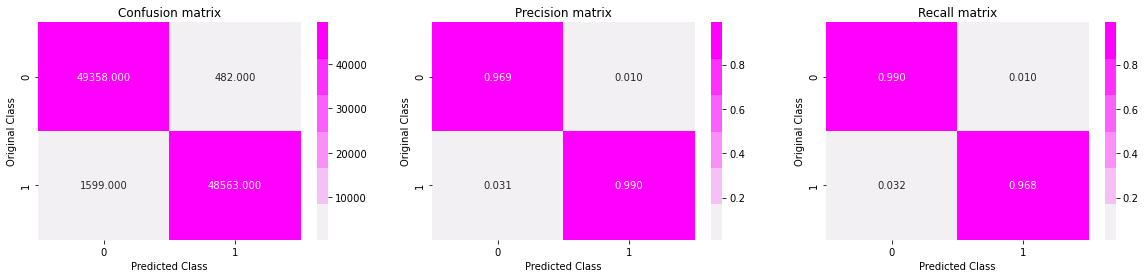

Test confusion_matrix ----------------------------------------------------------------------------------------------------


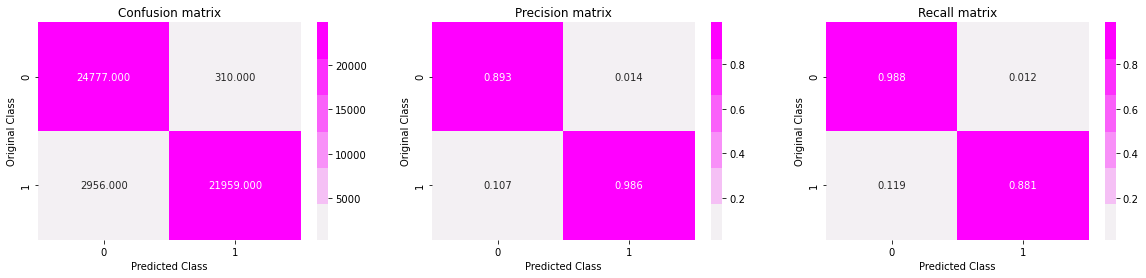

In [32]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train, y_train_pred)

print('Test confusion_matrix', '-'*100)
plot_confusion_matrix(y_test,y_test_pred)

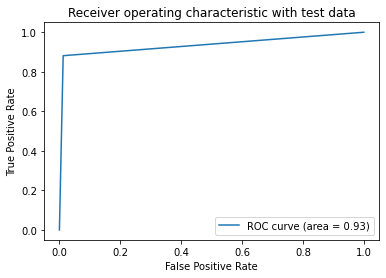

In [33]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,ths = roc_curve(y_test, y_test_pred)
auc_sc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

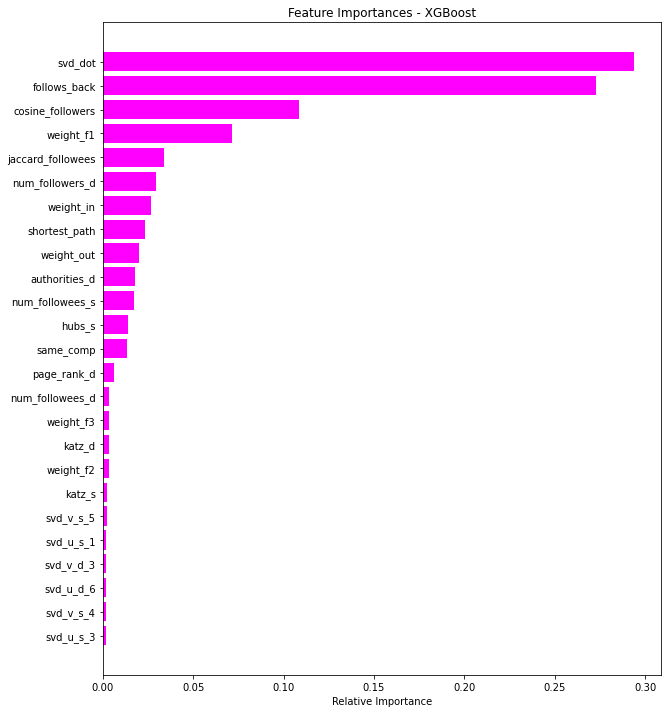

In [34]:
features = df_final_train.columns

importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]

plt.figure(figsize=(10,12))
plt.barh(range(len(indices)), importances[indices], color='magenta')

plt.title('Feature Importances - XGBoost')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()